In [1]:
%matplotlib inline
#basic python packages for plotting and array management
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import statsmodels.api as sm

#for data import
import pandas as pd
import os
import sys
from importlib import reload
reload(sys)

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

#Classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV, PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier

#Ensemble methods and crossvalidation
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier,RandomForestClassifier, VotingClassifier

#PostProcessing
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import time

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def creation(Table,Colonne,Liste):
    for element in Liste:     # On parcourt la liste en entier
        names = []
        for nuance in element:    # On parcourt chaque nuance de chaque sous-liste
            name_col = nuance
            name = Table[Colonne].str.contains(nuance).astype('float')
            names.append(name)
        
        col = pd.Series(0,index = range(Table.shape[0]))
        for column in names :
            col = col+column
        
        Table[name_col] = col
    return ('%d colonne(s) ont été ajoutées à la DataFrame' %(len(Liste)))

In [3]:
products = pd.read_csv("products.csv")
y_train = pd.read_csv("y_train.csv")
X_train = pd.read_csv("X_train.csv")
X_test   = pd.read_csv("X_test.csv")

# I) PRODUCTS

In [4]:
products.dtypes

VariantId                float64
GenderLabel               object
MarketTargetLabel         object
SeasonLabel               object
SeasonalityLabel          object
BrandId                  float64
UniverseLabel             object
TypeBrand                 object
ProductId                float64
ProductType               object
SupplierColor             object
ProductColorId           float64
MinSize                  float64
MaxSize                  float64
CalfTurn                 float64
UpperHeight              float64
HeelHeight               float64
PurchasePriceHT          float64
IsNewCollection          float64
SubtypeLabel              object
UpperMaterialLabel        object
LiningMaterialLabel       object
OutSoleMaterialLabel      object
RemovableSole             object
SizeAdviceDescription     object
dtype: object

In [5]:
products.head()

,VariantId,GenderLabel,MarketTargetLabel,SeasonLabel,SeasonalityLabel,BrandId,UniverseLabel,TypeBrand,ProductId,ProductType,...,UpperHeight,HeelHeight,PurchasePriceHT,IsNewCollection,SubtypeLabel,UpperMaterialLabel,LiningMaterialLabel,OutSoleMaterialLabel,RemovableSole,SizeAdviceDescription
0,728257.0,Homme,Classique,Automne/Hiver,Saisonnier,66.0,DÃ©tente,Standard,17267.0,Baskets,...,NaN,0.0,30.50,0.0,Montantes,NaN,NaN,NaN,False,Prenez une taille en dessous de votre pointure...
1,806356.0,Femme,ND,Automne/Hiver,Saisonnier,842.0,ND,Standard,30824.0,Baskets,...,0.0,0.0,43.00,0.0,Montantes,NaN,NaN,NaN,True,Prenez votre pointure habituelle
2,768790.0,Femme,ND,Automne/Hiver,Reconduit,988.0,Ville,Standard,62475.0,Bottines et boots,...,6.0,3.0,54.90,0.0,Bout pointu,NaN,NaN,NaN,False,Prenez votre pointure habituelle
3,515679.0,Femme,ND,Automne/Hiver,Saisonnier,769.0,Ville,Standard,43983.0,Escarpins,...,0.0,13.0,34.50,0.0,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle
4,1025246.0,Femme,ND,Automne/Hiver,Saisonnier,1244.0,ND,Standard,81493.0,Bottines et boots,...,8.0,4.0,43.76,0.0,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle


In [6]:
products.isnull().sum()

VariantId                     0
GenderLabel                   0
MarketTargetLabel             0
SeasonLabel                   0
SeasonalityLabel              0
BrandId                       0
UniverseLabel                 0
TypeBrand                     0
ProductId                     0
ProductType                1102
SupplierColor                 0
ProductColorId                0
MinSize                       0
MaxSize                       0
CalfTurn                 469539
UpperHeight              413501
HeelHeight                21625
PurchasePriceHT               0
IsNewCollection               0
SubtypeLabel              74305
UpperMaterialLabel       465587
LiningMaterialLabel      525811
OutSoleMaterialLabel     526199
RemovableSole             23107
SizeAdviceDescription     36301
dtype: int64

In [7]:
products.shape

(533520, 25)

# 1) Object columns

In [8]:
obj_df = products.select_dtypes(include=['object']).copy()
obj_df.head()

,GenderLabel,MarketTargetLabel,SeasonLabel,SeasonalityLabel,UniverseLabel,TypeBrand,ProductType,SupplierColor,SubtypeLabel,UpperMaterialLabel,LiningMaterialLabel,OutSoleMaterialLabel,RemovableSole,SizeAdviceDescription
0,Homme,Classique,Automne/Hiver,Saisonnier,DÃ©tente,Standard,Baskets,Vert FoncÃ©,Montantes,NaN,NaN,NaN,False,Prenez une taille en dessous de votre pointure...
1,Femme,ND,Automne/Hiver,Saisonnier,ND,Standard,Baskets,Jaune - Noir,Montantes,NaN,NaN,NaN,True,Prenez votre pointure habituelle
2,Femme,ND,Automne/Hiver,Reconduit,Ville,Standard,Bottines et boots,Paston Black,Bout pointu,NaN,NaN,NaN,False,Prenez votre pointure habituelle
3,Femme,ND,Automne/Hiver,Saisonnier,Ville,Standard,Escarpins,Daim brandy,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle
4,Femme,ND,Automne/Hiver,Saisonnier,ND,Standard,Bottines et boots,Negro,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle


In [9]:
obj_df.MarketTargetLabel.value_counts()

ND                             515401
Contemporaine                    6631
Suiveur                          2825
Fashionistas                     2214
Classique                        2183
Confort                          1549
Baroudeur                         771
Aventurier                        674
Skate                             556
Ethique                           293
Adulescante                       210
Monsieur Petit prix/Confort       123
contemporain                       89
Gothique                            1
Name: MarketTargetLabel, dtype: int64

In [10]:
obj_df.drop('MarketTargetLabel',axis=1,inplace=True)

In [11]:
# GenderLabel
obj_df = pd.get_dummies(obj_df, columns=["GenderLabel"])

In [12]:
# SeasonLabel
obj_df = pd.get_dummies(obj_df, columns=["SeasonLabel"])

In [13]:
# SeasonalityLabel
obj_df.drop('SeasonalityLabel',axis=1,inplace=True)

In [14]:
# UniverseLabel
obj_df.drop('UniverseLabel',axis=1,inplace=True)

In [15]:
obj_df.head()

,TypeBrand,ProductType,SupplierColor,SubtypeLabel,UpperMaterialLabel,LiningMaterialLabel,OutSoleMaterialLabel,RemovableSole,SizeAdviceDescription,GenderLabel_Accessoires,GenderLabel_Enfant,GenderLabel_Femme,GenderLabel_Homme,GenderLabel_Sacs,SeasonLabel_Automne/Hiver,SeasonLabel_Printemps/EtÃ©
0,Standard,Baskets,Vert FoncÃ©,Montantes,NaN,NaN,NaN,False,Prenez une taille en dessous de votre pointure...,0,0,0,1,0,1,0
1,Standard,Baskets,Jaune - Noir,Montantes,NaN,NaN,NaN,True,Prenez votre pointure habituelle,0,0,1,0,0,1,0
2,Standard,Bottines et boots,Paston Black,Bout pointu,NaN,NaN,NaN,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0
3,Standard,Escarpins,Daim brandy,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0
4,Standard,Bottines et boots,Negro,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0


In [16]:
# TypeBrand
obj_df = pd.get_dummies(obj_df, columns=["TypeBrand"])

In [17]:
obj_df.ProductType.value_counts()

Baskets                         148644
Sandales et nu-pieds             82596
Bottines et boots                81588
Escarpins                        36220
Chaussures Ã  lacets             35686
Ballerines                       35124
Chaussures de sport              30383
Bottes                           20072
Mocassins                        14287
Tongs                            13190
Chaussons                         8527
Mules et sabots                   6341
Chaussures Ã  scratch             6187
Sacs Ã  main                      5130
Espadrilles                       3917
Petite Maroquinerie               1047
Chaussettes et collants            640
Sacs Ã  dos                        521
Sacs pochettes                     490
Sacs de sport                      387
Sacs homme                         362
Ceintures                          324
Bagages                            290
Scolaire                           180
Business                            96
Semelles                 

In [18]:
# Product Type
obj_df.drop('ProductType',axis=1,inplace=True)

In [19]:
obj_df.head()

,SupplierColor,SubtypeLabel,UpperMaterialLabel,LiningMaterialLabel,OutSoleMaterialLabel,RemovableSole,SizeAdviceDescription,GenderLabel_Accessoires,GenderLabel_Enfant,GenderLabel_Femme,GenderLabel_Homme,GenderLabel_Sacs,SeasonLabel_Automne/Hiver,SeasonLabel_Printemps/EtÃ©,TypeBrand_Luxe,TypeBrand_Standard,TypeBrand_Super Luxe
0,Vert FoncÃ©,Montantes,NaN,NaN,NaN,False,Prenez une taille en dessous de votre pointure...,0,0,0,1,0,1,0,0,1,0
1,Jaune - Noir,Montantes,NaN,NaN,NaN,True,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0
2,Paston Black,Bout pointu,NaN,NaN,NaN,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0
3,Daim brandy,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0
4,Negro,Bout rond,NaN,NaN,NaN,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0


In [20]:
obj_df.drop("SupplierColor",axis=1,inplace=True)

In [21]:
obj_df.drop("SubtypeLabel",axis=1,inplace=True)

In [22]:
obj_df.drop("UpperMaterialLabel",axis=1,inplace=True)
obj_df.drop("LiningMaterialLabel",axis=1,inplace=True)
obj_df.drop("OutSoleMaterialLabel",axis=1,inplace=True)

In [23]:
obj_df.head()

,RemovableSole,SizeAdviceDescription,GenderLabel_Accessoires,GenderLabel_Enfant,GenderLabel_Femme,GenderLabel_Homme,GenderLabel_Sacs,SeasonLabel_Automne/Hiver,SeasonLabel_Printemps/EtÃ©,TypeBrand_Luxe,TypeBrand_Standard,TypeBrand_Super Luxe
0,False,Prenez une taille en dessous de votre pointure...,0,0,0,1,0,1,0,0,1,0
1,True,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0
2,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0
3,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0
4,False,Prenez votre pointure habituelle,0,0,1,0,0,1,0,0,1,0


In [24]:
obj_df = pd.get_dummies(obj_df, columns=["RemovableSole"])

In [25]:
# Size advice description
Label = [['chausse normalement','Prenez votre pointure habituelle'],['dessous'],['dessus'],['larges'],['fins']]
creation(obj_df,'SizeAdviceDescription',Label)

'5 colonne(s) ont été ajoutées à la DataFrame'

In [26]:
obj_df['Prenez votre pointure habituelle'].fillna(0,inplace=True)
obj_df['dessous'].fillna(0,inplace=True)
obj_df['dessus'].fillna(0,inplace=True)
obj_df['larges'].fillna(0,inplace=True)
obj_df['fins'].fillna(0,inplace=True)

In [27]:
obj_df.drop("SizeAdviceDescription",axis=1,inplace=True)

In [28]:
obj_df.dtypes

GenderLabel_Accessoires               uint8
GenderLabel_Enfant                    uint8
GenderLabel_Femme                     uint8
GenderLabel_Homme                     uint8
GenderLabel_Sacs                      uint8
SeasonLabel_Automne/Hiver             uint8
SeasonLabel_Printemps/EtÃ©            uint8
TypeBrand_Luxe                        uint8
TypeBrand_Standard                    uint8
TypeBrand_Super Luxe                  uint8
RemovableSole_False                   uint8
RemovableSole_True                    uint8
Prenez votre pointure habituelle    float64
dessous                             float64
dessus                              float64
larges                              float64
fins                                float64
dtype: object

# 2) INT COLUMNS

In [29]:
float_df = products.select_dtypes(include=['float64']).copy()
float_df.head()

,VariantId,BrandId,ProductId,ProductColorId,MinSize,MaxSize,CalfTurn,UpperHeight,HeelHeight,PurchasePriceHT,IsNewCollection
0,728257.0,66.0,17267.0,103627.0,41.0,41.0,NaN,NaN,0.0,30.50,0.0
1,806356.0,842.0,30824.0,114192.0,38.0,38.0,0.0,0.0,0.0,43.00,0.0
2,768790.0,988.0,62475.0,109185.0,38.0,38.0,NaN,6.0,3.0,54.90,0.0
3,515679.0,769.0,43983.0,73966.0,42.0,42.0,0.0,0.0,13.0,34.50,0.0
4,1025246.0,1244.0,81493.0,147548.0,37.0,37.0,NaN,8.0,4.0,43.76,0.0


In [30]:
float_df.drop("BrandId",axis=1,inplace=True)

In [31]:
float_df.drop("ProductId",axis=1,inplace=True)

In [32]:
float_df.drop("ProductColorId",axis=1,inplace=True)

In [33]:
float_df.isnull().sum()

VariantId               0
MinSize                 0
MaxSize                 0
CalfTurn           469539
UpperHeight        413501
HeelHeight          21625
PurchasePriceHT         0
IsNewCollection         0
dtype: int64

In [34]:
float_df.drop("CalfTurn",axis=1,inplace=True)

In [35]:
float_df.drop("UpperHeight",axis=1,inplace=True)

In [36]:
#HeelHeight

#Replace Missing Values with zero
float_df['HeelHeight'].fillna(0,inplace=True)

In [37]:
float_df.isnull().sum()

VariantId          0
MinSize            0
MaxSize            0
HeelHeight         0
PurchasePriceHT    0
IsNewCollection    0
dtype: int64

In [38]:
float_df.head()

,VariantId,MinSize,MaxSize,HeelHeight,PurchasePriceHT,IsNewCollection
0,728257.0,41.0,41.0,0.0,30.50,0.0
1,806356.0,38.0,38.0,0.0,43.00,0.0
2,768790.0,38.0,38.0,3.0,54.90,0.0
3,515679.0,42.0,42.0,13.0,34.50,0.0
4,1025246.0,37.0,37.0,4.0,43.76,0.0


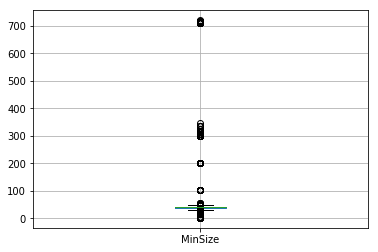

In [39]:
float_df.boxplot(column=['MinSize'],return_type='axes')

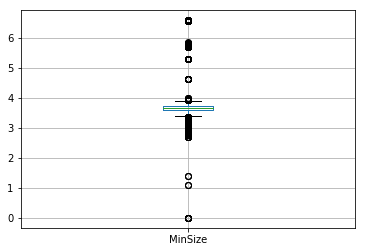

In [40]:
float_df['MinSize'] = np.log(float_df['MinSize'])
float_df.boxplot(column=['MinSize'],return_type='axes')

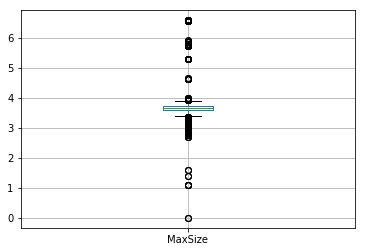

In [41]:
float_df['MaxSize'] = np.log(float_df['MaxSize'])
float_df.boxplot(column=['MaxSize'],return_type='axes')

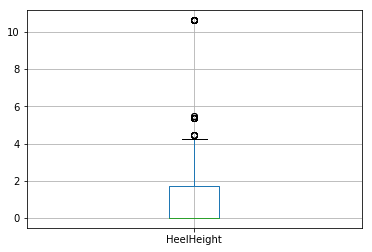

In [42]:
float_df['HeelHeight'] = np.sqrt(float_df['HeelHeight'])
float_df.boxplot(column=['HeelHeight'],return_type='axes')

In [43]:
float_df.drop("HeelHeight",axis=1,inplace=True)

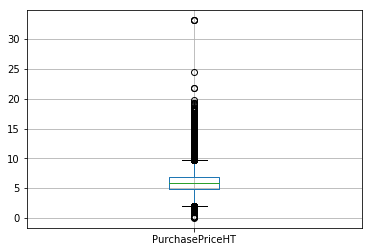

In [44]:
float_df['PurchasePriceHT'] = np.sqrt(float_df['PurchasePriceHT'])
float_df.boxplot(column=['PurchasePriceHT'],return_type='axes')

# Concatenation float+object

In [45]:
float_df.dtypes

VariantId          float64
MinSize            float64
MaxSize            float64
PurchasePriceHT    float64
IsNewCollection    float64
dtype: object

In [46]:
obj_df.dtypes

GenderLabel_Accessoires               uint8
GenderLabel_Enfant                    uint8
GenderLabel_Femme                     uint8
GenderLabel_Homme                     uint8
GenderLabel_Sacs                      uint8
SeasonLabel_Automne/Hiver             uint8
SeasonLabel_Printemps/EtÃ©            uint8
TypeBrand_Luxe                        uint8
TypeBrand_Standard                    uint8
TypeBrand_Super Luxe                  uint8
RemovableSole_False                   uint8
RemovableSole_True                    uint8
Prenez votre pointure habituelle    float64
dessous                             float64
dessus                              float64
larges                              float64
fins                                float64
dtype: object

In [47]:
print(float_df.shape)
print(obj_df.shape)

(533520, 5)
(533520, 17)


In [48]:
result_product = pd.concat([float_df,obj_df],axis=1) #nouveau products

In [49]:
result_product.isnull().sum()

VariantId                           0
MinSize                             0
MaxSize                             0
PurchasePriceHT                     0
IsNewCollection                     0
GenderLabel_Accessoires             0
GenderLabel_Enfant                  0
GenderLabel_Femme                   0
GenderLabel_Homme                   0
GenderLabel_Sacs                    0
SeasonLabel_Automne/Hiver           0
SeasonLabel_Printemps/EtÃ©          0
TypeBrand_Luxe                      0
TypeBrand_Standard                  0
TypeBrand_Super Luxe                0
RemovableSole_False                 0
RemovableSole_True                  0
Prenez votre pointure habituelle    0
dessous                             0
dessus                              0
larges                              0
fins                                0
dtype: int64

# II) ORDERS

In [50]:
X_train.dtypes

OrderNumber            int64
VariantId              int64
LineItem               int64
CustomerId             int64
OrderStatusLabel      object
OrderTypelabel        object
SeasonLabel           object
PayementModeLabel     object
CustomerTypeLabel     object
IsoCode               object
DeviceTypeLabel       object
PricingTypeLabel      object
TotalLineItems         int64
Quantity               int64
UnitPMPEUR            object
OrderCreationDate     object
OrderShipDate         object
OrderNumCustomer       int64
IsOnSale             float64
BillingPostalCode     object
dtype: object

In [51]:
X_train.head()

,OrderNumber,VariantId,LineItem,CustomerId,OrderStatusLabel,OrderTypelabel,SeasonLabel,PayementModeLabel,CustomerTypeLabel,IsoCode,DeviceTypeLabel,PricingTypeLabel,TotalLineItems,Quantity,UnitPMPEUR,OrderCreationDate,OrderShipDate,OrderNumCustomer,IsOnSale,BillingPostalCode
0,73521754,439729,1,12443972,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,2,1,"52,64",2011-10-26 12:10:48,2011-10-26 18:27:00,1,0.0,87000
1,73521754,440174,2,12443972,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,2,1,"52,64",2011-10-26 12:10:48,2011-10-26 18:27:00,1,0.0,87000
2,73525226,494501,1,12443958,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,1,1,"13,17",2011-10-26 12:11:38,2011-10-26 17:48:00,1,0.0,77700
3,73529009,439590,1,12443946,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,2,1,"56,4",2011-10-26 12:13:09,2011-10-26 17:59:00,1,0.0,44600
4,73529009,559476,2,12443946,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,2,1,37,2011-10-26 12:13:09,2011-10-26 17:59:00,1,0.0,44600


In [52]:
X_train.isnull().sum()

OrderNumber             0
VariantId               0
LineItem                0
CustomerId              0
OrderStatusLabel        0
OrderTypelabel          0
SeasonLabel             0
PayementModeLabel       0
CustomerTypeLabel       0
IsoCode                 0
DeviceTypeLabel         0
PricingTypeLabel        0
TotalLineItems          0
Quantity                0
UnitPMPEUR              0
OrderCreationDate       0
OrderShipDate           0
OrderNumCustomer        0
IsOnSale             7815
BillingPostalCode      52
dtype: int64

In [53]:
X_train.shape

(1067290, 20)

# 1) OBJECT COLUMNS

In [54]:
ord_df = X_train.select_dtypes(include=['object']).copy()
ord_df.head()

,OrderStatusLabel,OrderTypelabel,SeasonLabel,PayementModeLabel,CustomerTypeLabel,IsoCode,DeviceTypeLabel,PricingTypeLabel,UnitPMPEUR,OrderCreationDate,OrderShipDate,BillingPostalCode
0,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,"52,64",2011-10-26 12:10:48,2011-10-26 18:27:00,87000
1,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,"52,64",2011-10-26 12:10:48,2011-10-26 18:27:00,87000
2,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,"13,17",2011-10-26 12:11:38,2011-10-26 17:48:00,77700
3,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,"56,4",2011-10-26 12:13:09,2011-10-26 17:59:00,44600
4,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,ND,Plein Tarif,37,2011-10-26 12:13:09,2011-10-26 17:59:00,44600


In [55]:
# OrderstatusLabel
print(ord_df.OrderStatusLabel.value_counts())
ord_df.drop("OrderStatusLabel",axis=1,inplace=True)

Expédié    1067290
Name: OrderStatusLabel, dtype: int64


In [56]:
# OrderTypelabel
print(ord_df.OrderTypelabel.value_counts())
ord_df = pd.get_dummies(ord_df, columns=["OrderTypelabel"])

DIRECT      1033975
EXCHANGE      33315
Name: OrderTypelabel, dtype: int64


In [57]:
# SeasonLabel
print(ord_df.SeasonLabel.value_counts())
ord_df = pd.get_dummies(ord_df, columns=["SeasonLabel"])

Printemps/Eté    592694
Automne/Hiver    474596
Name: SeasonLabel, dtype: int64


In [58]:
# PayementModeLabel
print(ord_df.PayementModeLabel.value_counts())
ord_df.drop("PayementModeLabel",axis=1,inplace=True)

Carte bancaire       816469
PayPal               154745
Gratuit               35241
iDeal                 22887
Chèque                17313
BankTransfer_DE        7039
DotPay                 5173
maestro                3550
Cod_DHL                3386
BankTransfer_IBAN      1487
Name: PayementModeLabel, dtype: int64


In [59]:
# CustomerTypeLabel
print(ord_df.CustomerTypeLabel.value_counts())
ord_df = pd.get_dummies(ord_df, columns=["CustomerTypeLabel"])

Fidélisé    615726
Nouveau     451564
Name: CustomerTypeLabel, dtype: int64


In [60]:
# IsoCode
print(ord_df.IsoCode.value_counts())
ord_df.drop("IsoCode",axis=1,inplace=True)

FR    882181
DE     37600
BE     28845
NL     28730
GB     26152
ES     22582
IT     17714
PL      9163
DK      5957
SE      4733
LU      1376
AT       548
FI       456
GR       294
IE       237
PT       208
RO       135
CZ       127
SK        53
SI        47
HU        37
LT        34
EE        30
BG        29
LV        22
Name: IsoCode, dtype: int64


In [61]:
# DeviceTypeLabel
print(ord_df.DeviceTypeLabel.value_counts())
ord_df.drop("DeviceTypeLabel",axis=1,inplace=True)

ND         877457
Desktop    157382
Tablet      23132
Mobile       9319
Name: DeviceTypeLabel, dtype: int64


In [62]:
#PricingTypeLabel
print(ord_df.PricingTypeLabel.value_counts())
ord_df = pd.get_dummies(ord_df, columns=["PricingTypeLabel"])

Plein Tarif      450986
Soldes           318489
Promo Avec CP    144922
Promo Sans CP     95377
Vente Privée      57516
Name: PricingTypeLabel, dtype: int64


In [63]:
g = lambda x: x.replace(",",".")
ord_df.UnitPMPEUR = map(np.float64,(map(g,ord_df.UnitPMPEUR)))

In [64]:
ord_df.head()

,UnitPMPEUR,OrderCreationDate,OrderShipDate,BillingPostalCode,OrderTypelabel_DIRECT,OrderTypelabel_EXCHANGE,SeasonLabel_Automne/Hiver,SeasonLabel_Printemps/Eté,CustomerTypeLabel_Fidélisé,CustomerTypeLabel_Nouveau,PricingTypeLabel_Plein Tarif,PricingTypeLabel_Promo Avec CP,PricingTypeLabel_Promo Sans CP,PricingTypeLabel_Soldes,PricingTypeLabel_Vente Privée
0,<map object at 0x11933b748>,2011-10-26 12:10:48,2011-10-26 18:27:00,87000,1,0,1,0,0,1,1,0,0,0,0
1,<map object at 0x11933b748>,2011-10-26 12:10:48,2011-10-26 18:27:00,87000,1,0,1,0,0,1,1,0,0,0,0
2,<map object at 0x11933b748>,2011-10-26 12:11:38,2011-10-26 17:48:00,77700,1,0,1,0,0,1,1,0,0,0,0
3,<map object at 0x11933b748>,2011-10-26 12:13:09,2011-10-26 17:59:00,44600,1,0,1,0,0,1,1,0,0,0,0
4,<map object at 0x11933b748>,2011-10-26 12:13:09,2011-10-26 17:59:00,44600,1,0,1,0,0,1,1,0,0,0,0


In [65]:
# Date
ord_df.drop("OrderCreationDate",axis=1,inplace=True)
ord_df.drop("OrderShipDate",axis=1,inplace=True)

In [66]:
# BillingPostalCode
ord_df.drop("BillingPostalCode",axis=1,inplace=True)

In [67]:
ord_df.dtypes

UnitPMPEUR                        object
OrderTypelabel_DIRECT              uint8
OrderTypelabel_EXCHANGE            uint8
SeasonLabel_Automne/Hiver          uint8
SeasonLabel_Printemps/Eté          uint8
CustomerTypeLabel_Fidélisé         uint8
CustomerTypeLabel_Nouveau          uint8
PricingTypeLabel_Plein Tarif       uint8
PricingTypeLabel_Promo Avec CP     uint8
PricingTypeLabel_Promo Sans CP     uint8
PricingTypeLabel_Soldes            uint8
PricingTypeLabel_Vente Privée      uint8
dtype: object

# 2) FLOAT COLUMNS

In [68]:
floatord_df = X_train.select_dtypes(include=['int64']).copy()
floatord_df.head()

,OrderNumber,VariantId,LineItem,CustomerId,TotalLineItems,Quantity,OrderNumCustomer
0,73521754,439729,1,12443972,2,1,1
1,73521754,440174,2,12443972,2,1,1
2,73525226,494501,1,12443958,1,1,1
3,73529009,439590,1,12443946,2,1,1
4,73529009,559476,2,12443946,2,1,1


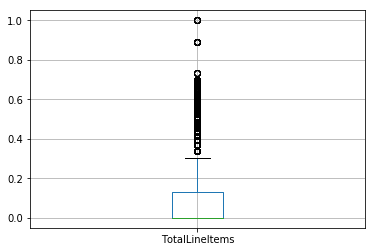

In [69]:
floatord_df['TotalLineItems'] = (np.log(floatord_df['TotalLineItems']))
floatord_df['TotalLineItems'] = (floatord_df['TotalLineItems'])/max(floatord_df['TotalLineItems'])
floatord_df.boxplot(column=['TotalLineItems'],return_type='axes')

In [70]:
floatord_df.drop("Quantity",axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


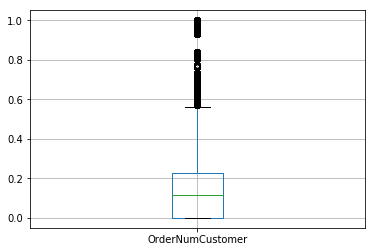

In [71]:
floatord_df['OrderNumCustomer'] = (np.log(floatord_df['OrderNumCustomer']))
floatord_df['OrderNumCustomer'] = (floatord_df['OrderNumCustomer'])/max(floatord_df['OrderNumCustomer'])
floatord_df.boxplot(column=['OrderNumCustomer'],return_type='axes')

# 3) CONCATENATE INT+OBJECT

In [72]:
result_order = pd.concat([floatord_df,ord_df],axis=1) #nouveau X_train

# III) X_TEST

In [73]:
X_test.isnull().sum()

OrderNumber             0
VariantId               0
LineItem                0
CustomerId              0
OrderStatusLabel        0
OrderTypelabel          0
SeasonLabel             0
PayementModeLabel       0
CustomerTypeLabel       0
IsoCode                 0
DeviceTypeLabel         0
PricingTypeLabel        0
TotalLineItems          0
Quantity                0
UnitPMPEUR              0
OrderCreationDate       0
OrderShipDate           0
OrderNumCustomer        0
IsOnSale             2254
BillingPostalCode      27
dtype: int64

# 1) OBJECT COLUMNS

In [74]:
test_df = X_test.select_dtypes(include=['object']).copy()
test_df.head()

,OrderStatusLabel,OrderTypelabel,SeasonLabel,PayementModeLabel,CustomerTypeLabel,IsoCode,DeviceTypeLabel,PricingTypeLabel,UnitPMPEUR,OrderCreationDate,OrderShipDate,BillingPostalCode
0,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Fidélisé,GB,Desktop,Promo Avec CP,"52,92",2014-12-02 14:59:54,2014-12-03 19:40:00,SW4 0DX
1,Expédié,DIRECT,Automne/Hiver,Klarna_Invoice,Fidélisé,DE,Desktop,Promo Avec CP,"32,4355",2014-12-02 15:00:41,2014-12-03 11:24:00,66887
2,Expédié,DIRECT,Automne/Hiver,Carte bancaire,Nouveau,FR,Desktop,Plein Tarif,"66,65",2014-12-02 15:01:18,2014-12-03 17:21:00,77600
3,Expédié,DIRECT,Automne/Hiver,PayPal,Nouveau,DE,Desktop,Promo Avec CP,"35,72",2014-12-02 15:03:24,2014-12-03 13:13:00,45879
4,Expédié,DIRECT,Automne/Hiver,BankTransfer_IBAN,Nouveau,ES,Desktop,Plein Tarif,"23,86",2014-12-02 15:04:13,2014-12-04 17:41:00,08006


In [75]:
# OrderstatusLabel
print(test_df.OrderStatusLabel.value_counts())
test_df.drop("OrderStatusLabel",axis=1,inplace=True)

Expédié    800468
Name: OrderStatusLabel, dtype: int64


In [76]:
# OrderTypelabel
print(test_df.OrderTypelabel.value_counts())
test_df = pd.get_dummies(test_df, columns=["OrderTypelabel"])

DIRECT      775334
EXCHANGE     25134
Name: OrderTypelabel, dtype: int64


In [77]:
# SeasonLabel
print(test_df.SeasonLabel.value_counts())
test_df = pd.get_dummies(test_df, columns=["SeasonLabel"])

Printemps/Eté    465647
Automne/Hiver    334821
Name: SeasonLabel, dtype: int64


In [78]:
# PayementModeLabel
print(test_df.PayementModeLabel.value_counts())
test_df.drop("PayementModeLabel",axis=1,inplace=True)

Carte bancaire          495398
PayPal                  127765
Klarna_Invoice           44369
iDeal                    33954
Gratuit                  27033
Cod_UPS                  14702
maestro                  13392
Cod_GLS                  11802
DotPay                    6833
Chèque                    5642
Cod_Nacex                 5309
P3X                       5232
BankTransfer_DE           4574
BankTransfer_IBAN         1478
Klarna_Account            1425
BankTransfer_PL           1179
SwissBilling_Invoice       381
Name: PayementModeLabel, dtype: int64


In [79]:
# CustomerTypeLabel
print(test_df.CustomerTypeLabel.value_counts())
test_df = pd.get_dummies(test_df, columns=["CustomerTypeLabel"])

Fidélisé    470044
Nouveau     330424
Name: CustomerTypeLabel, dtype: int64


In [80]:
# IsoCode
print(test_df.IsoCode.value_counts())
test_df.drop("IsoCode",axis=1,inplace=True)

FR    507355
DE     71942
NL     50461
BE     35096
IT     28613
ES     28462
PL     25366
GB     19774
SE     13969
DK      8288
CH      6108
AT      1836
LU       933
FI       338
RO       314
IE       254
PT       225
SI       201
GR       188
HR       179
BG       103
LT        94
CZ        82
LV        80
HU        76
EE        67
SK        64
Name: IsoCode, dtype: int64


In [81]:
# DeviceTypeLabel
print(test_df.DeviceTypeLabel.value_counts())
test_df.drop("DeviceTypeLabel",axis=1,inplace=True)

Desktop    585610
Mobile     110941
Tablet     101471
ND           2446
Name: DeviceTypeLabel, dtype: int64


In [82]:
#PricingTypeLabel
print(test_df.PricingTypeLabel.value_counts())
test_df = pd.get_dummies(test_df, columns=["PricingTypeLabel"])

Plein Tarif      370933
Soldes           219383
Promo Avec CP    147723
Promo Sans CP     33153
Vente Privée      29276
Name: PricingTypeLabel, dtype: int64


In [83]:
# UnitPMPEUR
g = lambda x: x.replace(",",".")
test_df.UnitPMPEUR = map(np.float64,(map(g,test_df.UnitPMPEUR)))

In [84]:
# Date
test_df.drop("OrderCreationDate",axis=1,inplace=True)
test_df.drop("OrderShipDate",axis=1,inplace=True)

In [85]:
# BillingPostalCode
test_df.drop("BillingPostalCode",axis=1,inplace=True)

# 2) INT COLUMNS

In [86]:
floattest_df = X_test.select_dtypes(include=['int64']).copy()
floattest_df.head()

,OrderNumber,VariantId,LineItem,CustomerId,TotalLineItems,Quantity,OrderNumCustomer
0,90607166,754279,1,14369241,2,1,3
1,90621016,1043714,1,16121040,1,1,2
2,90630628,302486,1,16271310,1,1,1
3,90641377,1300698,1,16271314,1,1,1
4,90652456,1392714,1,16251703,1,1,1


In [87]:
floattest_df['TotalLineItems'] = (np.log(floattest_df['TotalLineItems']))
floattest_df['TotalLineItems'] = (floattest_df['TotalLineItems'])/max(floattest_df['TotalLineItems'])

In [88]:
floattest_df.drop("Quantity",axis=1,inplace=True)

In [89]:
floattest_df['OrderNumCustomer'] = (np.log(floattest_df['OrderNumCustomer']))
floattest_df['OrderNumCustomer'] = (floattest_df['OrderNumCustomer'])/max(floattest_df['OrderNumCustomer'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


# 3) CONCATENATE INT+OBJECT

In [90]:
result_test = pd.concat([floattest_df,test_df],axis=1) #nouveau X_test

# Merge X_train avec products

In [91]:
orders_return = pd.merge(result_order,y_train,how='inner',on=['OrderNumber','LineItem'])

In [92]:
orders_products = pd.merge(orders_return,result_product,how='inner',on='VariantId')

In [93]:
y_data = orders_products.ReturnQuantityBin

In [94]:
data = orders_products.drop(['ReturnQuantity','ReturnQuantityBin'],axis=1,inplace=False)

In [95]:
# Line Item
data['LineItem'] = np.log(data['LineItem'])
data['LineItem'] = data['LineItem']/max(data['LineItem'])

In [96]:
# VariantId, OrderNumber, CustomerId
data.drop('VariantId',axis=1,inplace=True) # Ne sert pas
data.drop('OrderNumber',axis=1,inplace=True)
data.drop('CustomerId',axis=1,inplace=True)

In [97]:
data.shape

(689670, 36)

# Merge X_test avec products

In [98]:
result_test.shape

(800468, 18)

In [99]:
data_test = pd.merge(result_test,result_product,how='left',on='VariantId')
#data_test = result_test

In [100]:
# Line Item
data_test['LineItem'] = np.log(data_test['LineItem'])
data_test['LineItem'] = data_test['LineItem']/max(data_test['LineItem'])

In [101]:
# VariantId, OrderNumber, CustomerId
data_test.drop('VariantId',axis=1,inplace=True) # Ne sert pas
data_test.drop('OrderNumber',axis=1,inplace=True)
data_test.drop('CustomerId',axis=1,inplace=True)

In [102]:
data_test.shape

(800468, 36)

# Apply the mask

In [103]:
def funk_mask(d):
    " Defining a simple mask over the input data "
    columns_ext = []
    X1 = d.loc[:,[xx for xx in d.columns if xx not in columns_ext]]
    g = lambda x: x.replace(",",".")
    #X1.UnitPMPEUR = map(np.float64,(map(g,X1.UnitPMPEUR)))
    columns2bin = [x for x in X1.columns if X1[x].dtype == np.dtype('O')]
    X2 = pd.get_dummies(X1.loc[:,columns2bin])
    X1 = X1.loc[:,[xx for xx in X1.columns if xx not in columns2bin]]
    res = pd.concat([X1,X2],axis=1)
    res = res.fillna(0)
    return(res)

In [104]:
x1 = funk_mask(data)
x2 = funk_mask(data_test)
seleckt_columns = np.intersect1d(x1.columns,x2.columns)
x1 = x1.loc[:,seleckt_columns]
x2 = x2.loc[:,seleckt_columns]

In [105]:
data.drop("UnitPMPEUR",axis=1,inplace=True)
data_test.drop("UnitPMPEUR",axis=1,inplace=True)

In [106]:
data = data.fillna(0)
data_test = data_test.fillna(0)

In [111]:
clf = RandomForestClassifier()
clf.fit(data.iloc[:500000], y_data[:500000])
y_tosubmit = clf.predict_proba(data_test.loc[:,x1.columns])
score_forest = np.mean(cross_val_score(clf,data.iloc[:500000], y_data[:500000],cv=10))

In [112]:
print(score_forest)

0.742399954477


In [115]:
yres = clf.predict_proba(x1.loc[:500000,x1.columns])
print(roc_auc_score(y_train.ReturnQuantityBin.iloc[:500001],yres[:,1]))

0.498619080019


In [114]:
np.savetxt('y_pred.txt', y_tosubmit[:,1], fmt='%f')